In [1]:
import os
import cv2
import pickle
import shutil
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm

In [2]:
import os
import shutil

In [9]:
paths = {
    # 'FD-027': ['/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-027/diffgen-2025-07-13-00-54/styled_samples_400x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-027/diffgen-2025-07-23-01-29/styled_samples_260x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-027/diffgen-2025-07-12-00-38/styled_samples_183x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-029/diffgen-2025-07-12-03-48/styled_samples_180x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-027/diffgen-2025-07-09-13-50/styled_samples_183x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-027/diffgen-2025-06-29-03-16/styled_samples_288x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-027/diffgen-2025-06-24-19-17/styled_samples_288x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-027/diffgen-2025-07-23-10-39/styled_samples_480x256x256x4.pkl'],
    # 'FD-029': ['/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-029/diffgen-2025-07-13-07-47/styled_samples_560x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-029/diffgen-2025-07-12-03-48/styled_samples_185x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-029/diffgen-2025-06-29-18-09/styled_samples_288x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-029/diffgen-2025-06-25-09-26/styled_samples_288x256x256x4.pkl'],
    'FD-030': ['/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-030/diffgen-2025-07-22-01-14/styled_samples_1701x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-030/diffgen-2025-06-25-04-45/styled_samples_288x256x256x4.pkl'],
    # 'FD-031': ['/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-031/diffgen-2025-07-13-17-25/styled_samples_860x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-031/diffgen-2025-06-29-08-13/styled_samples_288x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-031/diffgen-2025-06-24-23-57/styled_samples_288x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-031/diffgen-2025-07-23-10-37/styled_samples_258x256x256x4.pkl'],
    # 'FD-032': ['/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-032/diffgen-2025-07-15-02-07/styled_samples_1503x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-032/diffgen-2025-07-12-07-05/styled_samples_183x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-032/diffgen-2025-07-11-13-57/styled_samples_183x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-032/diffgen-2025-07-11-13-57/styled_samples_183x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-032/diffgen-2025-07-08-21-16/styled_samples_183x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-032/diffgen-2025-06-28-21-00/styled_samples_288x256x256x4.pkl', '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-032/diffgen-2025-06-24-14-34/styled_samples_288x256x256x4.pkl']
}

styled_img_paths = []

for subject, subject_paths in paths.items():
    for path in subject_paths:
        if os.path.exists(path):
            styled_img_paths.append(path)
        else:
            print(f"Path {path} does not exist.")
            

In [9]:

masked_images_folder_path = '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'

shape = (256, 256)

In [10]:
export_path_nonzero_masks = 'nonzero_masks'
export_path_zero_masks = 'zero_masks'
export_path_low_ssim = 'low_ssim'
export_path_high_ssim = 'high_ssim'
export_path_limited_mask = 'limited_masks'

shutil.rmtree(export_path_low_ssim, ignore_errors=True)
os.makedirs(export_path_low_ssim, exist_ok=True)

shutil.rmtree(export_path_nonzero_masks, ignore_errors=True)
os.makedirs(export_path_nonzero_masks, exist_ok=True)

shutil.rmtree(export_path_high_ssim, ignore_errors=True)
os.makedirs(export_path_high_ssim, exist_ok=True)

shutil.rmtree(export_path_limited_mask, ignore_errors=True)
os.makedirs(export_path_limited_mask, exist_ok=True)

In [22]:
filename_images

{'FD-032-slice-04-image.png': <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>,
 'FD-029-slice-19-mask.png': <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>,
 'FD-030-slice-13-mask.png': <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>,
 'FD-029-slice-48-mask.png': <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>,
 'FD-031-slice-43-mask.png': <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>,
 'FD-027-slice-71-image.png': <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>,
 'FD-031-slice-16-mask.png': <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>,
 'FD-031-slice-26-mask.png': <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>,
 'FD-027-slice-52-mask.png': <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>,
 'FD-027-slice-24-image.png': <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>,
 'FD-027-slice-47-image.png': <PIL.PngImagePlugin.PngImageFile image mode=L size=256x256>,
 'FD-0

In [21]:

filename_images = {}
filename_masks = {}
masked_images = os.listdir(masked_images_folder_path)

for filename in masked_images:
    if not filename.endswith('.png') and not filename.endswith('.jpg'):
        continue
        
    img_path = os.path.join(masked_images_folder_path, filename)
    mask_path = os.path.join(masked_images_folder_path, filename.replace('-image', '-mask'))

    image = Image.open(img_path)
    mask = Image.open(mask_path)

    filename_images[filename] = image
    filename_masks[filename] = mask

# Clear the export path directories if they exists
if os.path.exists(export_path_nonzero_masks):
    shutil.rmtree(export_path_nonzero_masks)

os.makedirs(export_path_nonzero_masks, exist_ok=True)

if os.path.exists(export_path_zero_masks):
    shutil.rmtree(export_path_zero_masks)
    

os.makedirs(export_path_zero_masks, exist_ok=True)

In [12]:
shutil.rmtree(export_path_high_ssim)
os.makedirs(export_path_high_ssim, exist_ok=True)

shutil.rmtree(export_path_low_ssim)
os.makedirs(export_path_low_ssim, exist_ok=True)

shutil.rmtree(export_path_limited_mask)
os.makedirs(export_path_limited_mask, exist_ok=True)

In [13]:
from skimage.metrics import structural_similarity as ssim

In [14]:
import cv2
import numpy as np
from typing import Tuple

# def is_cohesive_mask(mask_gray: np.ndarray,
#                      thresh_method: str = 'otsu',
#                      min_area: int = 50,
#                      main_frac_thresh: float = 0.6,
#                      max_extra_components: int = 1) -> bool:
#     """
#     Decide whether a grayscale mask is coherent (one big region) or incohesive
#     (many small regions).

#     Parameters
#     ----------
#     mask_gray : np.ndarray
#         2D array, single-channel mask (uint8 or float in [0,1]).
#     thresh_method : str
#         'otsu' | 'adaptive' | 'fixed' — how to binarize.
#     min_area : int
#         Ignore components smaller than this (noise filter).
#     main_frac_thresh : float
#         Fraction of total mask area the largest component must exceed to be
#         considered dominant.
#     max_extra_components : int
#         Allow at most this many additional (filtered) components.

#     Returns
#     -------
#     bool
#         True if “coherent” (one dominant region), False otherwise.
#     """
#     # ——— ensure uint8 [0,255] ———
#     if mask_gray.dtype == np.float32 or mask_gray.dtype == np.float64:
#         img = (mask_gray * 255).astype(np.uint8)
#     else:
#         img = mask_gray.astype(np.uint8)

#     # ——— binarize ———
#     if thresh_method == 'otsu':
#         _, bw = cv2.threshold(img, 0, 255,
#                               cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#     elif thresh_method == 'adaptive':
#         bw = cv2.adaptiveThreshold(img, 255,
#                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                                    cv2.THRESH_BINARY,
#                                    blockSize=11, C=2)
#     else:  # 'fixed'
#         _, bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

#     # ——— connected components ———
#     n_labels, labels, stats, _ = cv2.connectedComponentsWithStats(bw,
#                                                                   connectivity=8)
#     # stats[:, cv2.CC_STAT_AREA] is pixel-area for each label;
#     # skip label 0 (background)
#     areas = stats[1:, cv2.CC_STAT_AREA]

#     # ——— filter out tiny noise blobs ———
#     areas = areas[areas >= min_area]
#     if areas.size == 0:
#         return False

#     total = areas.sum()
#     largest = areas.max()
#     extras = areas.size - 1

#     # ——— decision ———
#     # coherent if one blob covers ≥ main_frac_thresh of all mask pixels,
#     # and there are at most max_extra_components others
#     if (largest / total) >= main_frac_thresh and extras <= max_extra_components:
#         return True
#     else:
#         return False

def is_cohesive_mask(mask_gray: np.ndarray,
                     thresh_method: str = 'otsu',
                     min_area: int = 50,
                     main_frac_thresh: float = 0.6,
                     max_extra_components: int = 1
                    ) -> Tuple[bool, np.ndarray]:
    """
    Decide whether a grayscale mask is coherent (one big region) or incohesive
    (many small regions), *and* return a mask image that contains only the
    dominant region(s).

    Returns
    -------
    coherent : bool
        True if one blob covers ≥ `main_frac_thresh` of all (filtered) mask pixels
        and there are at most `max_extra_components` others.
    mask_filtered : np.ndarray
        8‑bit binary image (0 or 255) where only the largest region and up to
        `max_extra_components` next‑largest regions are kept.
    """
    # ——— ensure uint8 [0,255] ———
    if mask_gray.dtype in (np.float32, np.float64):
        img = (mask_gray * 255).astype(np.uint8)
    else:
        img = mask_gray.astype(np.uint8)

    # ——— binarize ———
    if thresh_method == 'otsu':
        _, bw = cv2.threshold(img, 0, 255,
                              cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    elif thresh_method == 'adaptive':
        bw = cv2.adaptiveThreshold(img, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY,
                                   blockSize=11, C=2)
    else:  # 'fixed'
        _, bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # ——— connected components ———
    n_labels, labels, stats, _ = cv2.connectedComponentsWithStats(bw,
                                                                  connectivity=8)
    # stats[i, cv2.CC_STAT_AREA] is area of label i
    # skip stats[0] (background)
    areas = stats[1:, cv2.CC_STAT_AREA]
    labels_list = np.arange(1, n_labels)

    # ——— filter out tiny noise blobs ———
    keep = areas >= min_area
    if not np.any(keep):
        # no component big enough
        empty_mask = np.zeros_like(bw)
        return False, empty_mask

    filtered_labels = labels_list[keep]
    filtered_areas = areas[keep]
    total_area = filtered_areas.sum()

    # ——— sort by descending area ———
    idx_sorted = np.argsort(-filtered_areas)
    sorted_labels = filtered_labels[idx_sorted]

    # ——— select top regions ———
    keep_labels = sorted_labels[: 1 + max_extra_components]

    # ——— build filtered mask ———
    mask_filtered = np.isin(labels, keep_labels).astype(np.uint8) * 255

    # ——— decision ———
    largest_area = filtered_areas[idx_sorted[0]]
    num_extras = len(filtered_labels) - 1
    coherent = (largest_area / total_area) >= main_frac_thresh and \
               num_extras <= max_extra_components

    return coherent, mask_filtered


In [15]:
import pandas as pd

In [16]:
random_samples_folder_path = '/home/miguel/GI/1.5 - Synthetic Data Generation/Singan-Seg/Output/RandomSamples'

In [ ]:
for filename in os.listdir(random_samples_folder_path):
    if 'case' in filename:
        continue
    random_samples_path = os.path.join(random_samples_folder_path, filename, 'gen_start_scale=0')
    

In [18]:
filename

'FD-029-slice-06-image'

In [19]:
import cv2

  0%|          | 0/10 [00:00<?, ?it/s]


KeyboardInterrupt: 

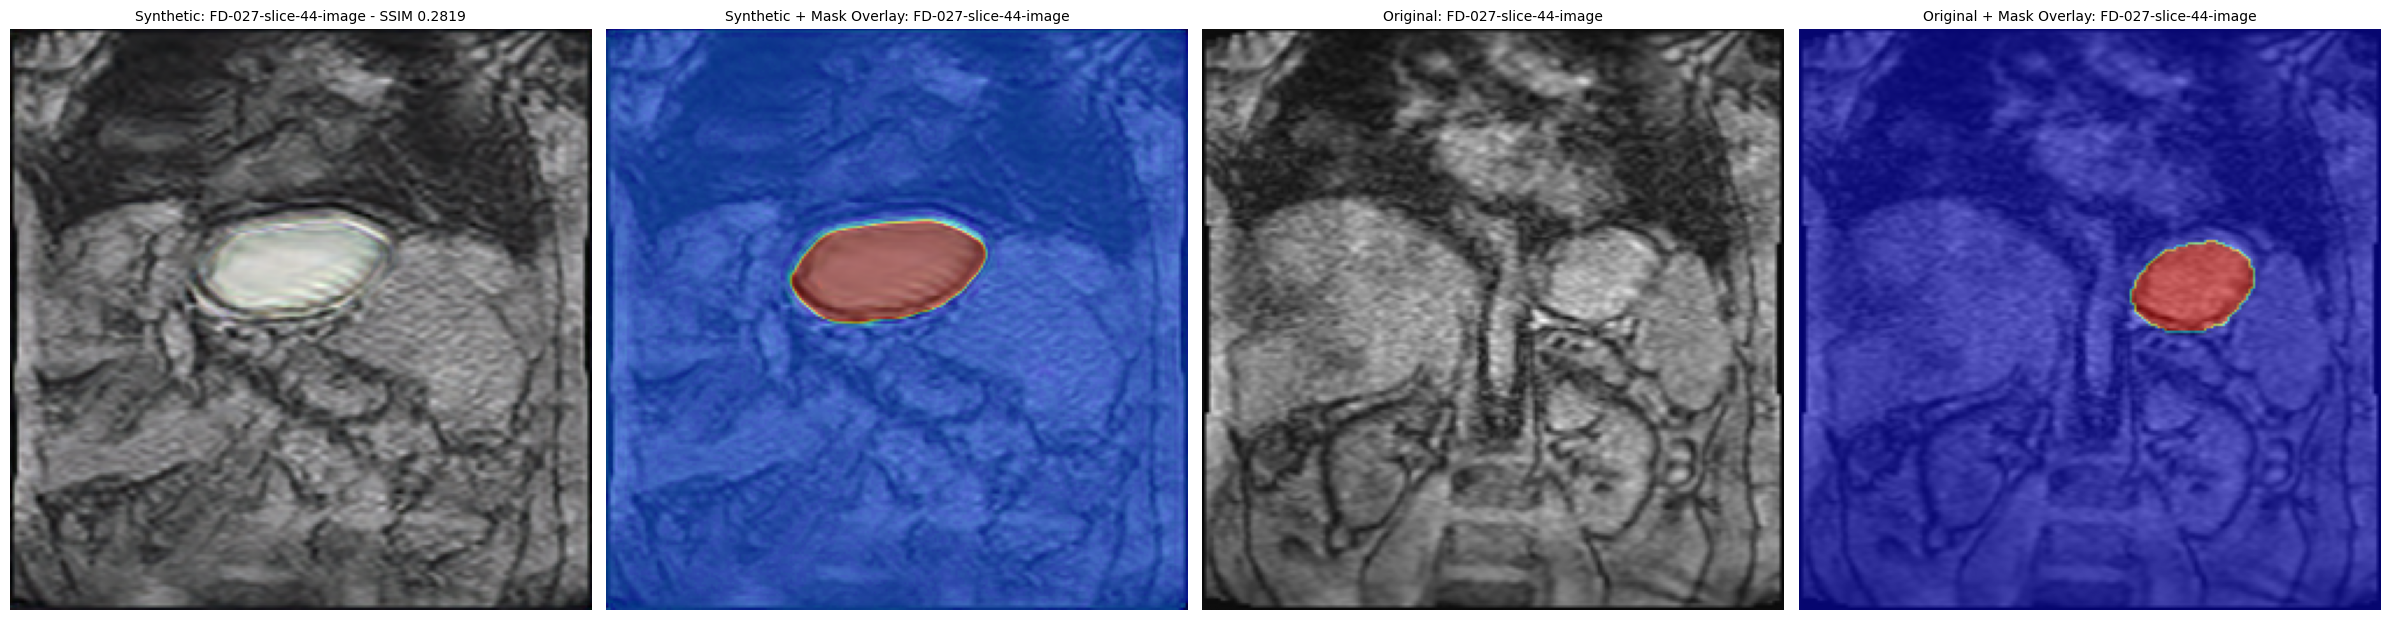

In [ ]:
num_nonzero_masks = 0
num_masks = 0

mask_min = 0
mask_max = 0

num_limited_masks = 0

ssim_values = []
psnr_values = []
cv_subjects = []

original_images = []
synthetic_images = []
 
HIGH_SSIM_THRESHOLD = 0.5
LOW_SSIM_THRESHOLD = 0.1

for filename in os.listdir(random_samples_folder_path)[::10]:
    if 'case' in filename:
        continue
    random_samples_path = os.path.join(random_samples_folder_path, filename, 'gen_start_scale=0')
    
    for image_name in tqdm(os.listdir(random_samples_path)[::5]):
        if 'img' not in image_name:
            continue
        image_path = os.path.join(random_samples_path, image_name)
        mask_path = image_path.replace('img', 'mask')

        # Split synthetic image and mask
        synthetic_image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED).astype(np.uint8)
        synthetic_gray = cv2.cvtColor(np.asarray(synthetic_image), cv2.COLOR_RGB2GRAY)

        mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED).astype(np.uint8)
        # make mask gray
        mask = cv2.cvtColor(mask, cv2.COLOR_RGBA2GRAY) if mask.ndim == 3 else mask

        mask_min = min(mask_min, mask.flatten().min())
        mask_max = max(mask_max, mask.flatten().max())

        mask_normalized = mask / 255.0  # Normalize to [0,1] for transparency

        original_image = filename_images.get(filename + '.png', None)
        if original_image is None:
            print(f"Warning: No original image found for {filename}. Skipping.")
            continue

        original_mask = filename_masks.get(filename + '.png', None)
        if original_mask is None:
            print(f"Warning: No original mask found for {filename}. Skipping.")
            continue

        # Resize synthetic image and mask to match original image size
        original_image = cv2.resize(np.array(original_image), (synthetic_image.shape[1], synthetic_image.shape[0]))
        original_mask = cv2.resize(np.array(original_mask), (synthetic_image.shape[1], synthetic_image.shape[0]))
        
        has_mask = mask_normalized.flatten().sum() > 5
        if has_mask:
            num_nonzero_masks += 1
        num_masks += 1

        export_path = export_path_nonzero_masks if has_mask else export_path_zero_masks

        ssim_value = ssim(
            np.array(original_image),
            synthetic_gray,
            full=True
        )[0]

        cv_subject = '-'.join(filename.split('-')[:2])

        ssim_values.append({'ssim_value': ssim_value, 'cv_subject': cv_subject})

        psnr = cv2.PSNR(
            np.array(original_image),
            synthetic_gray
        )

        psnr_values.append({'psnr_value': psnr, 'cv_subject': cv_subject})

        export_paths = [export_path]

        if (ssim_value > HIGH_SSIM_THRESHOLD):
            export_paths.append(export_path_high_ssim)

        elif (ssim_value < LOW_SSIM_THRESHOLD):
            export_paths.append(export_path_low_ssim)
        
        mask_bool = mask > 200
        percent_mask_highlighted = np.sum(mask_bool) / mask_bool.size 
        is_cohesive_mask_image, cohesive_mask = is_cohesive_mask(mask_normalized, thresh_method='otsu', min_area=50, main_frac_thresh=0.6, max_extra_components=1)
        if percent_mask_highlighted < 0.5 and is_cohesive_mask_image:
            export_paths.append(export_path_limited_mask)

        for path in export_paths:
            # Save original synthetic image
            orig_filename = os.path.join(path, f"{filename}_synthetic.png")
            cv2.imwrite(orig_filename, cv2.cvtColor(synthetic_image, cv2.COLOR_RGB2BGR))

            # Save the raw mask
            mask_filename = os.path.join(path, f"{filename}_synthetic_mask.png")
            cv2.imwrite(mask_filename, (mask_normalized * 255).astype(np.uint8))
            num_limited_masks+= 1

        # Create and save the overlay
        fig, axes = plt.subplots(1, 4, figsize=(24, 12))
        axes[0].imshow(synthetic_image, cmap='gray')
        axes[0].set_title(f"Synthetic: {filename} - SSIM {ssim_value:.4f}", fontsize=10)
        axes[0].axis('off')

        axes[1].imshow(synthetic_image, cmap='gray')
        axes[1].imshow(mask_normalized * 255, cmap='jet', alpha=0.5)
        axes[1].set_title(f"Synthetic + Mask Overlay: {filename}", fontsize=10)
        axes[1].axis('off')
        
        axes[2].imshow(original_image, cmap='gray')
        axes[2].set_title(f"Original: {filename}", fontsize=10)
        axes[2].axis('off')

        axes[3].imshow(original_image, cmap='gray')
        axes[3].imshow(original_mask, cmap='jet', alpha=0.5)
        axes[3].set_title(f"Original + Mask Overlay: {filename}", fontsize=10)
        axes[3].axis('off')

        overlay_filename = os.path.join(export_path, f"{filename}_overlay.png")
        plt.tight_layout()
        plt.savefig(overlay_filename, bbox_inches='tight')

        for path in export_paths:
            overlay_filename = os.path.join(path, f"{filename}_overlay.png")
            plt.savefig(overlay_filename, bbox_inches='tight')

        plt.close(fig)

        # Convert original and synthetic gray images to RGB
        original_image = cv2.cvtColor(np.array(original_image), cv2.COLOR_GRAY2RGB)
        synthetic_gray = cv2.cvtColor(synthetic_gray, cv2.COLOR_GRAY2RGB)

        original_images.append({'original_image': original_image, 'cv_subject': cv_subject})
        synthetic_images.append({'synthetic_image': synthetic_gray, 'cv_subject': cv_subject})

In [30]:
np.array(original_image).shape

(256, 256)

In [28]:
synthetic_gray.shape

(250, 250)

In [ ]:
os.makedirs(export_path_low_ssim, exist_ok=True)

In [61]:
len(os.listdir('/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/testing_notebooks/limited_masks'))

66

In [12]:
ssim_values_all =np.array(ssim_values)

In [ ]:

synthetic_gray = cv2.cvtColor(np.asarray(synthetic_img), cv2.COLOR_RGB2GRAY)

In [62]:

mask_bool = synthetic_gray > 50
percent_mask_highlighted = np.sum(mask_bool) / mask_bool.size 

In [17]:
len(ssim_values_all[ssim_values_all > 0.2]) / len(ssim_values_all)

0.07103825136612021

In [31]:
original_images[0].shape

(256, 256)

In [ ]:
# Compute Frechet Inception Distance

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from scipy.linalg import sqrtm
import numpy as np

# 1) Preprocessing: resize to 299×299, convert to tensor, normalize like Inception expects
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# 2) Load Inception v3 (pretrained) and strip off the final fc so it returns 2048‐d features
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
inception = models.inception_v3(pretrained=True, transform_input=False)
inception.fc = nn.Identity()
inception.eval().to(device)

def get_activations(images, model, batch_size=32):
    """
    images: list of H×W×3 uint8 RGB NumPy arrays
    returns: N×2048 array of features
    """
    acts = []
    with torch.no_grad():
        for i in range(0, len(images), batch_size):
            batch = images[i:i+batch_size]
            # preprocess each image
            batch_t = torch.stack([preprocess(img) for img in batch]).to(device)
            feat = model(batch_t)                 # shape [B,2048]
            acts.append(feat.cpu().numpy())
    return np.concatenate(acts, axis=0)

def calculate_fid(orig_imgs, synth_imgs):
    # 1) Extract activations
    act1 = get_activations(orig_imgs, inception)
    act2 = get_activations(synth_imgs, inception)

    # 2) Compute mean & covariance
    mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)

    # 3) Compute Frechet distance
    diff = mu1 - mu2
    covmean, _ = sqrtm(sigma1.dot(sigma2), disp=False)
    if np.iscomplexobj(covmean):
        covmean = covmean.real  # numerical fix

    fid = diff.dot(diff) + np.trace(sigma1 + sigma2 - 2 * covmean)
    return fid


In [37]:
fid_score = calculate_fid(original_images, synthetic_images)
print(f"→ Frechet Inception Distance: {fid_score:.4f}")

→ Frechet Inception Distance: 172.3221


In [26]:
synthetic_images[0].shape

(256, 256, 3)

In [ ]:
synthetic_gray = cv2.cvtColor(np.asarray(synthetic_img), cv2.COLOR_RGB2GRAY)


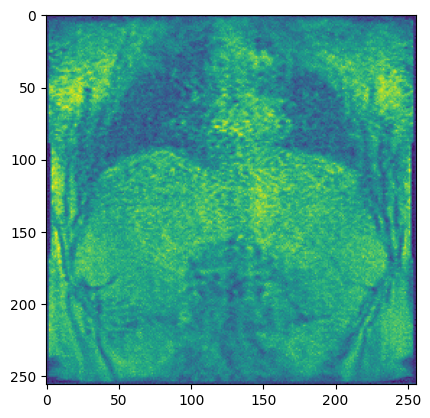

In [24]:
plt.imshow(synthetic_gray)